In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/University/machine_learning/old_ml/exercise

Mounted at /content/gdrive
/content/gdrive/MyDrive/University/machine_learning/old_ml/exercise


In [2]:
!ls

0_ml_exercise_preprocess.ipynb	1_ml_exercise_classical.ipynb  2_ml_exercise_neural.ipynb  data


In [ ]:
#imports for data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#imports for feature selection
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

In [ ]:
depress = pd.read_csv("data/depression.csv", encoding="UTF-8")

# 1 Preprocessing

## 1.1 Data exploration
<a name="data_explore"></a>

In [ ]:
depress.head()

,AGERNG,GENDER,EDU,PROF,MARSTS,RESDPL,LIVWTH,ENVSAT,POSSAT,FINSTR,...,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,26-30,Female,Post Graduate,Unemployed,Unmarried,Town,With Family,Yes,Yes,No,...,Yes,No,No,No,No,No,No,Yes,No,0
1,26-30,Male,Post Graduate,Service holder (Private),Unmarried,City,With Family,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,Yes,No,No,1
2,21-25,Male,HSC,Student,Unmarried,City,With Family,Yes,Yes,No,...,Yes,Yes,No,No,No,No,No,No,No,0
3,16-20,Male,HSC,Student,Unmarried,City,With Family,No,Yes,No,...,Yes,Yes,No,Yes,No,No,No,No,No,1
4,21-25,Male,Graduate,Student,Unmarried,Town,With Family,No,Yes,Yes,...,Yes,Yes,No,No,No,No,Yes,Yes,No,1


Check for missing values:

In [ ]:
depress.isnull().sum()

AGERNG       0
GENDER       0
EDU          0
PROF         0
MARSTS       0
RESDPL       0
LIVWTH       0
ENVSAT       0
POSSAT       0
FINSTR       0
DEBT         0
PHYEX        0
SMOKE        0
DRINK        0
ILLNESS      0
PREMED       0
EATDIS       0
AVGSLP       0
INSOM        0
TSSN         0
WRKPRE       0
ANXI         0
DEPRI        0
ABUSED       0
CHEAT        0
THREAT       0
SUICIDE      0
INFER        0
CONFLICT     0
LOST         0
DEPRESSED    0
dtype: int64

In [ ]:
# check the possible values of each feature in the dataset
for col in depress:
    print(col,"\n",depress[col].unique(),"\n")

AGERNG 
 ['26-30' '21-25' '16-20' '31-35' '46-50' '41-45' '56-60' '36-40' '61+'
 '51-55'] 

GENDER 
 ['Female' 'Male'] 

EDU 
 ['Post Graduate' 'HSC' 'Graduate' 'SSC'] 

PROF 
 ['Unemployed' 'Service holder (Private)' 'Student'
 'Service holder (Government)' 'Other' 'Businessman'] 

MARSTS 
 ['Unmarried' 'Married' 'Divorced'] 

RESDPL 
 ['Town' 'City' 'Village'] 

LIVWTH 
 ['With Family' 'Without Family'] 

ENVSAT 
 ['Yes' 'No'] 

POSSAT 
 ['Yes' 'No'] 

FINSTR 
 ['No' 'Yes'] 

DEBT 
 ['No' 'Yes'] 

PHYEX 
 ['Sometimes' 'Never' 'Regularly'] 

SMOKE 
 ['No' 'Yes'] 

DRINK 
 ['Yes' 'No'] 

ILLNESS 
 ['No' 'Yes'] 

PREMED 
 ['No' 'Yes'] 

EATDIS 
 ['No' 'Yes'] 

AVGSLP 
 ['More than 8 hours' '6 hours' '8 hours' '7 hours' '5 hours'
 'Below 5 hours'] 

INSOM 
 ['No' 'Yes'] 

TSSN 
 ['2-4 hours a day' '5-7 hours a day' '8-10 hours a day'
 'More than 10 hours a day' 'Less than 2 hours'] 

WRKPRE 
 ['No Pressure' 'Moderate' 'Mild' 'Severe'] 

ANXI 
 ['Yes' 'No'] 

DEPRI 
 ['No' 'Yes'] 

ABUSED

##1.2 Data preparation
<a name="data_prepare"></a>

Apart from our label (DEPRESSED), all of the features contain textual data (or a combination of strings and integers). Classical and neural machine learning algorithms covered in this course so far cannot work with textual data*, so it must be converted to numerical data; as Sklearn's encoders transform data into floats, I will use these instead of strings.

There are a variety of ways to do this, but I will limit myself to techniques seen in the early ML classes (so no text vectorisation, for instance).

*This assignment was given before we moved on to Natural Language Processing.

In [ ]:
depress = depress.replace({"Yes": 1.0, "No":0.0}).replace({"With Family": 1.0, "Without Family": 0.0}).replace({"Female":1.0, "Male":0.0})
depress["DEPRESSED"] = depress["DEPRESSED"].astype(float)

depress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGERNG     604 non-null    object 
 1   GENDER     604 non-null    float64
 2   EDU        604 non-null    object 
 3   PROF       604 non-null    object 
 4   MARSTS     604 non-null    object 
 5   RESDPL     604 non-null    object 
 6   LIVWTH     604 non-null    float64
 7   ENVSAT     604 non-null    float64
 8   POSSAT     604 non-null    float64
 9   FINSTR     604 non-null    float64
 10  DEBT       604 non-null    float64
 11  PHYEX      604 non-null    object 
 12  SMOKE      604 non-null    float64
 13  DRINK      604 non-null    float64
 14  ILLNESS    604 non-null    float64
 15  PREMED     604 non-null    float64
 16  EATDIS     604 non-null    float64
 17  AVGSLP     604 non-null    object 
 18  INSOM      604 non-null    float64
 19  TSSN       604 non-null    object 
 20  WRKPRE    

Some of the features have an ordered relationship, so ordinally encoding these might be desirable. However, when we look at the feature values listed in [section 1.1](#data_explore), we see that the sequence of these values is disordered. Following the philosophy of ordinal encoding, where each subsequent number of the feature's category is given more weight, I will assign floats manually, in accordance to which category would logically put an individual more at risk of developing depression.

In [ ]:
depress.EDU.replace({"Post Graduate": 0.0, "Graduate": 1.0, "HSC": 2.0, "SSC": 3.0}, inplace=True)
depress.PHYEX.replace({"Regularly": 0.0, "Sometimes": 1.0, "Never": 2.0}, inplace=True)
depress.AVGSLP.replace({"More than 8 hours": 0.0, "8 hours": 1.0, "7 hours": 2.0,
                  "6 hours": 3.0, "5 hours": 4.0, "Below 5 hours": 5.0}, inplace=True)
depress.TSSN.replace({"Less than 2 hours": 0.0, "2-4 hours a day": 1.0, "5-7 hours a day": 2.0,
                 "8-10 hours a day": 3.0, "More than 10 hours a day": 4.0}, inplace=True)
depress.WRKPRE.replace({"No Pressure": 0.0, "Mild": 1.0, "Moderate": 2.0, "Severe": 3.0}, inplace=True)

depress.head()

,AGERNG,GENDER,EDU,PROF,MARSTS,RESDPL,LIVWTH,ENVSAT,POSSAT,FINSTR,...,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,26-30,1.0,0.0,Unemployed,Unmarried,Town,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,26-30,0.0,0.0,Service holder (Private),Unmarried,City,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,21-25,0.0,2.0,Student,Unmarried,City,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16-20,0.0,2.0,Student,Unmarried,City,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,21-25,0.0,1.0,Student,Unmarried,Town,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


The remainder of the features don't seem to imply an ordered relationship, so we will one-hot encode those.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
feat_arr = cat_encoder.fit_transform(depress[["AGERNG", "PROF", "MARSTS", "RESDPL"]]).toarray()

In [ ]:
cat_encoder.categories_

[array(['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50',
        '51-55', '56-60', '61+'], dtype=object),
 array(['Businessman', 'Other', 'Service holder (Government)',
        'Service holder (Private)', 'Student', 'Unemployed'], dtype=object),
 array(['Divorced', 'Married', 'Unmarried'], dtype=object),
 array(['City', 'Town', 'Village'], dtype=object)]

In [ ]:
feat_labels = cat_encoder.categories_

# flatten the array so we can use them as headers in the dataframe
feat_labels = np.hstack(feat_labels)

In [ ]:
enc_feat = pd.DataFrame(feat_arr, columns=feat_labels)

In [ ]:
# create a new data frame with the encoded categories
depress_enc = pd.concat([enc_feat, depress], axis=1)
depress_enc.drop(depress_enc[["AGERNG", "PROF", "MARSTS", "RESDPL"]], axis=1, inplace=True)
depress_enc.head()

,16-20,21-25,26-30,31-35,36-40,41-45,46-50,51-55,56-60,61+,...,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


##1.3 Feature selection
<a name="feature_select"></a>

Let's split our features (X) and labels (y).

In [ ]:
X = depress_enc.drop("DEPRESSED", axis=1)
y = depress_enc["DEPRESSED"]

In [ ]:
X_train_select, X_test_select, y_train_select, y_test_select = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

I will test two feature selection techniques given in the paper to calculate which features are useful for our model. One is Sklearn's [SelectKBest](#selectkbest) SelectKBest feature selector, the other one is Sklearn's [RFE](#rfe). A third option, [Boruta](#boruta) was explored, but ultimately cut from this workflow.

###1.3.1 Boruta
<a name="boruta"></a>

Boruta works as a wrapper around a RandomForest algorithm and will iteratively select important features by eliminating those which it deems irrelevant. The features will be ranked based on importance (1 being important, with higher n indicating decreased relevance). Originally, I was going to use BorutaPy to perform another type of recursive feature elimination.

However, Boruta is no longer compatible with modern versions of NumPy. One way to make it work is by downgrading NumPy, which is for me a non-negotiable. There's still a hacky way to make it work by manually changing the NumPy data types before fitting, to prevent the raising of an Attribute Error due to the incompatibility.

Moreover, according to the research paper, the features selected by Boruta did not lead to the best performing models, with sklearn's SelectKBest being the superior method. While I will retain the code written to implement Boruta, I'm hashing it out and give preference to a different method by sklearn known as RFE (recursive feature elimination).

In [ ]:
# magic command to remove all text output

#%%capture
#!pip install Boruta

In [ ]:
#from boruta import BorutaPy

#forest = RandomForestClassifier(max_depth=5, random_state=42)

#feat_names = np.array(X.columns)
#feat_select = BorutaPy(forest, n_estimators="auto", random_state=42)

#np.int = np.int32
#np.float = np.float64
#np.bool = np.bool_

#feat_select.fit(X_train_select.to_numpy(), y_train_select.to_numpy())

#X_filtered = feat_select.transform(X_train_select.to_numpy())

#feat_ranks = list(zip(feat_names,
#                         feat_select.ranking_,
#                         feat_select.support_))

#depress_rank = pd.DataFrame(feat_ranks, columns=["Feature", "Ranking", "Useful?"])
#depress_rank.sort_values("Ranking")

,Feature,Ranking,Useful?
47,LOST,1,True
26,POSSAT,1,True
27,FINSTR,1,True
37,TSSN,1,True
25,ENVSAT,1,True
39,ANXI,1,True
46,CONFLICT,1,True
41,ABUSED,1,True
42,CHEAT,1,True
43,THREAT,1,True


###1.3.2 Select K Best
<a name="selectkbest"></a>

In [ ]:
best_feat = SelectKBest(score_func=chi2, k=10)
scorefit = best_feat.fit(X_train_select, y_train_select)

# create data frame to store the results
depress_scores = pd.DataFrame(scorefit.scores_)
depress_columns = pd.DataFrame(X_train_select.columns)

feat_scores = pd.concat([depress_columns, depress_scores], axis=1)
feat_scores.columns = ["Feature", "Score"]

feat_scores.sort_values("Score", ascending=False)

,Feature,Score
45,INFER,53.780432
40,DEPRI,53.754232
39,ANXI,46.900530
26,POSSAT,42.904378
41,ABUSED,41.823757
42,CHEAT,36.554157
46,CONFLICT,35.617527
44,SUICIDE,21.020899
47,LOST,20.957207
36,INSOM,20.639833


In [ ]:
#create new data frame with the isolated features

depress_kbest = depress_enc[["DEPRI",
                             "INFER",
                             "ANXI",
                             "POSSAT",
                             "CHEAT",
                             "ABUSED",
                             "CONFLICT",
                             "SUICIDE",
                             "THREAT",
                             "LOST",
                             "FINSTR",
                             "INSOM",
                             "ENVSAT",
                             "DEBT"]
                            ]

depress_kbest.head()

,DEPRI,INFER,ANXI,POSSAT,CHEAT,ABUSED,CONFLICT,SUICIDE,THREAT,LOST,FINSTR,INSOM,ENVSAT,DEBT
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


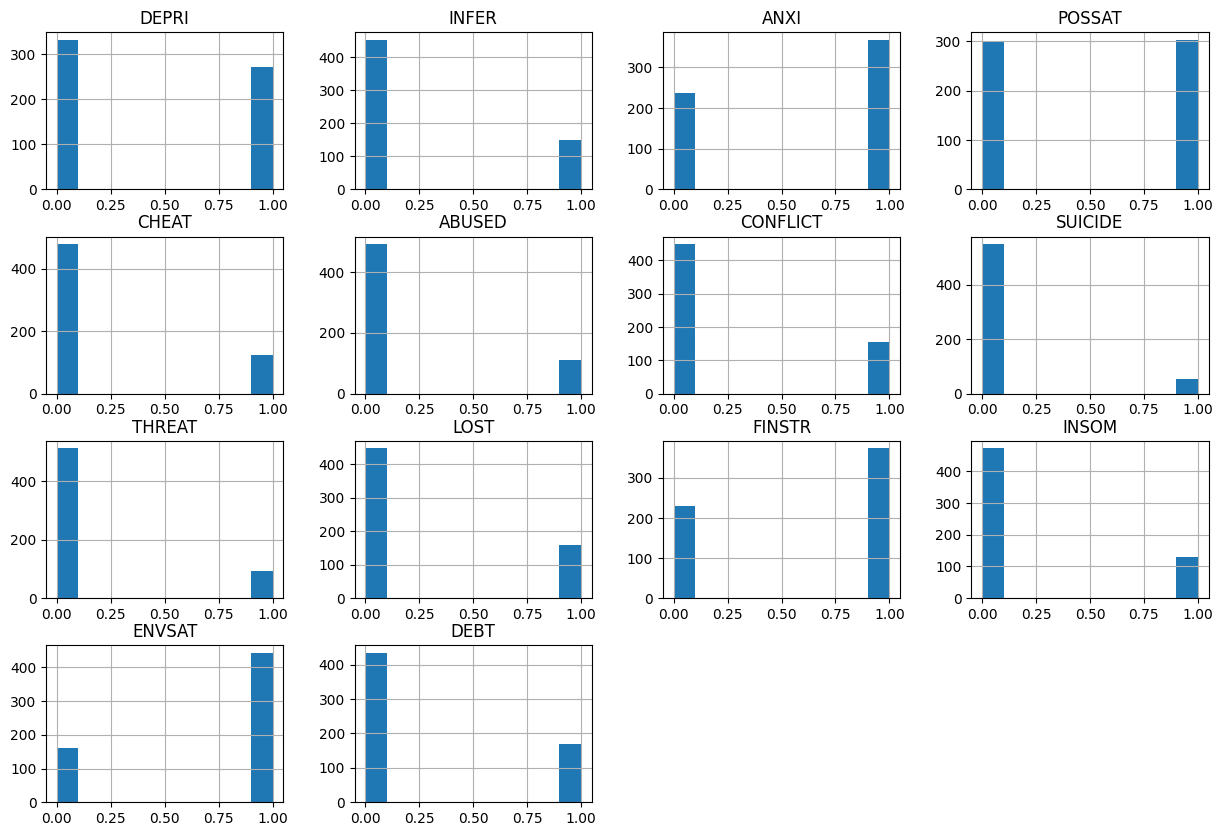

In [ ]:
pd.plotting.hist_frame(depress_kbest, figsize=(15,10), bins=10);

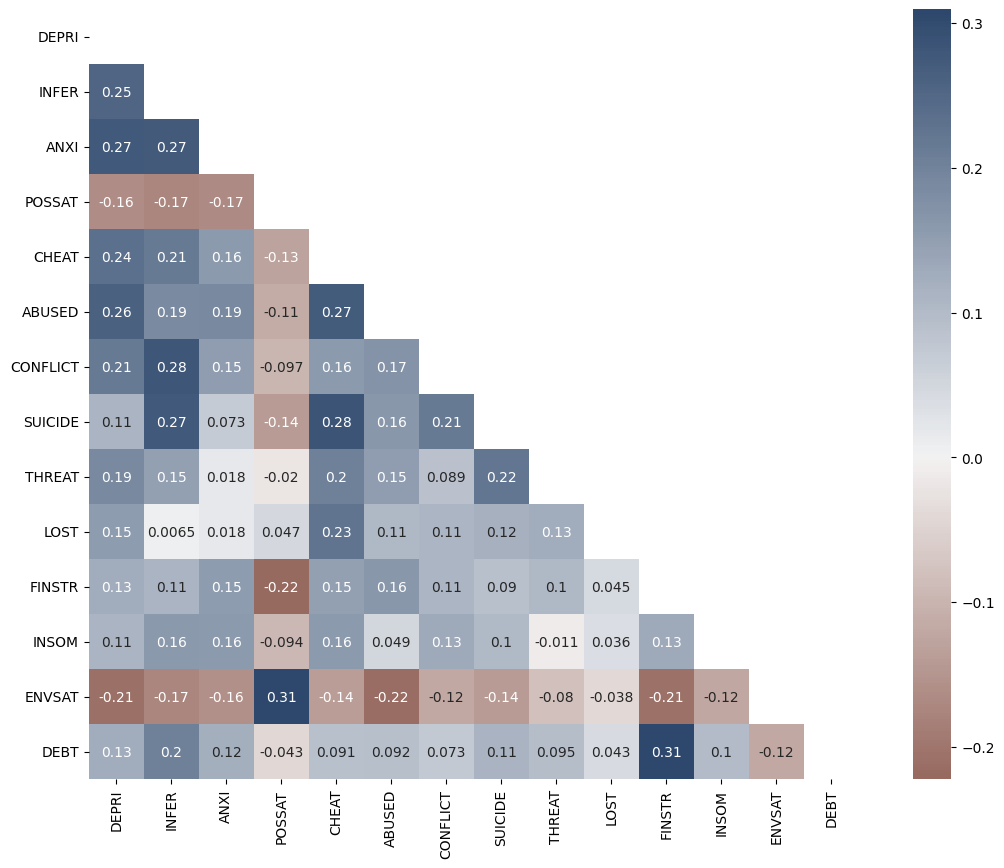

In [ ]:
#check correlation between isolated features

plt.figure(figsize=(14, 10))

#define heatmap
hmap = depress_kbest.corr()

#define colour map
cmap = sns.diverging_palette(h_neg=20, h_pos=250, s=65, l=30,
                            center="light", as_cmap=True)

#define mask to hide mirrored values in the table
mask = np.triu(np.ones_like(hmap, dtype=bool))

#create the plot
sns.heatmap(hmap, mask=mask, center=0, annot=True,
            square=True, cmap=cmap);

The plot shows that feelings of inferiority (INFER) and deprivation of something (DEPRI) amplify each other. Similarly, anxiety (ANXI) leads to feeling deprived, as well as inferiority complex, and vice versa. Furthermore, whether participants are satisfied with their environment (ENVSAT) is related to satisficatin with their position workplace or academic achievements (POSSAT). Whether a respondent is in debt correlates higher to financial stress (FINSTR).

Conversly, financial stress goes down with higher workplace/achievement satisfaction. Environment satisfaction lowers when the participants feel deprived of something, or when they felt abused recently, or if they are suffering from financial stress.

In [ ]:
# attach label column to the dataframe

depress_kbest = pd.concat([depress_kbest, depress_enc["DEPRESSED"]], axis=1)
depress_kbest.head()

,DEPRI,INFER,ANXI,POSSAT,CHEAT,ABUSED,CONFLICT,SUICIDE,THREAT,LOST,FINSTR,INSOM,ENVSAT,DEBT,DEPRESSED,DEPRESSED
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
#save the data frame with selected features as a .csv file

depress_kbest.to_csv("data/depress_kbest.csv",
                     index=False)

###1.3.3 Recursive feature elimination (RFE)
<a name="rfe"></a>

In [ ]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=14)
rfe.fit(X_train_select, y_train_select)

# create data frame to store the results
depress_rfe_ranking = pd.DataFrame({"Feature": X_train_select.columns,
                             "Rank": rfe.ranking_,
                             "Useful?": rfe.support_
                             })

depress_rfe_ranking.sort_values("Rank")

,Feature,Rank,Useful?
23,EDU,1,True
45,INFER,1,True
41,ABUSED,1,True
40,DEPRI,1,True
39,ANXI,1,True
38,WRKPRE,1,True
37,TSSN,1,True
35,AVGSLP,1,True
29,PHYEX,1,True
27,FINSTR,1,True


In [ ]:
#create new data frame with the isolated features

depress_rfe = depress_enc[["DEPRI",
                           "INFER",
                           "ANXI",
                           "POSSAT",
                           "CHEAT",
                           "CONFLICT",
                           "LOST",
                           "FINSTR",
                           "ENVSAT",
                           "EDU",
                           "WRKPRE",
                           "TSSN",
                           "AVGSLP",
                           "PHYEX"]
                          ]

depress_rfe.head()

,DEPRI,INFER,ANXI,POSSAT,CHEAT,CONFLICT,LOST,FINSTR,ENVSAT,EDU,WRKPRE,TSSN,AVGSLP,PHYEX
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,3.0,2.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,2.0
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,2.0,1.0
4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0


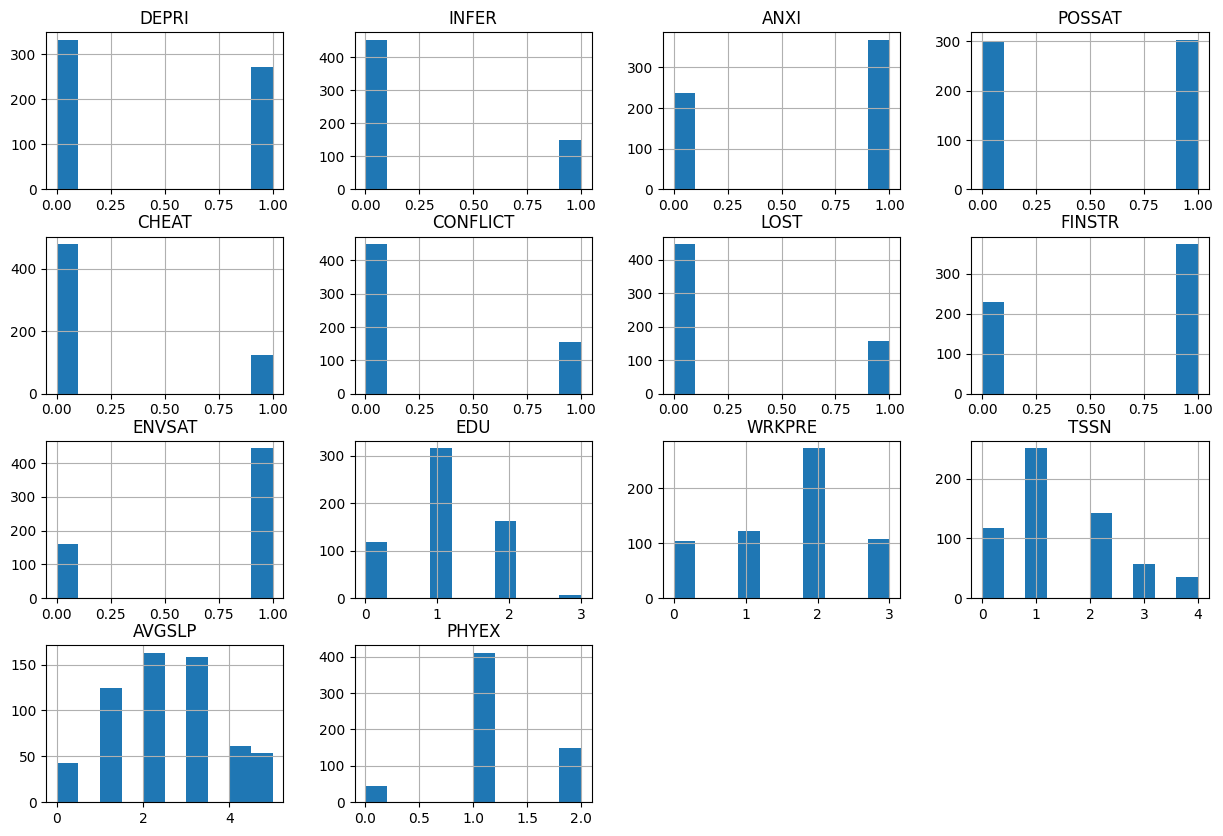

In [ ]:
pd.plotting.hist_frame(depress_rfe, figsize=(15,10), bins=10);

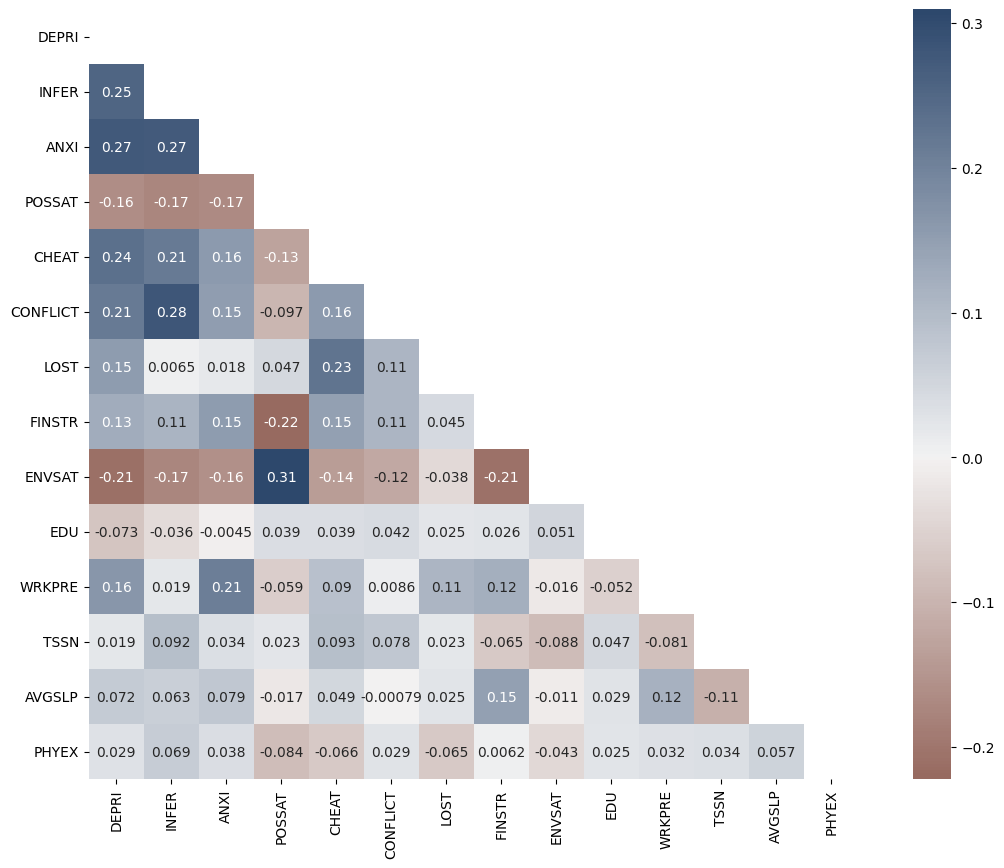

In [ ]:
#check correlation between isolated features

plt.figure(figsize=(14, 10))

#define heatmap
hmap = depress_rfe.corr()

#define colour map
cmap = sns.diverging_palette(h_neg=20, h_pos=250, s=65, l=30,
                            center="light", as_cmap=True)

#define mask to hide mirrored values in the table
mask = np.triu(np.ones_like(hmap, dtype=bool))

#create the plot
sns.heatmap(hmap, mask=mask, center=0, annot=True,
            square=True, cmap=cmap);

While SelectKBest only returned features with binary values as useful, RFE also returned features with ordinal relationships to one another. The correlations with these features are weaker than those selected by SelectKBest.

In [ ]:
# attach label column to data frame with selected features

depress_rfe = pd.concat([depress_rfe, depress_enc["DEPRESSED"]], axis=1)
depress_rfe.head()

,DEPRI,INFER,ANXI,POSSAT,CHEAT,CONFLICT,LOST,FINSTR,ENVSAT,EDU,WRKPRE,TSSN,AVGSLP,PHYEX,DEPRESSED
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,3.0,2.0,1.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,2.0,0.0
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,2.0,1.0,1.0
4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,1.0


In [ ]:
#save the data frame with selected features as a .csv file

depress_rfe.to_csv("data/depress_rfe.csv",
                   index=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((483, 12), (121, 12), (483,), (121,))

Let's check the dataset's balance.

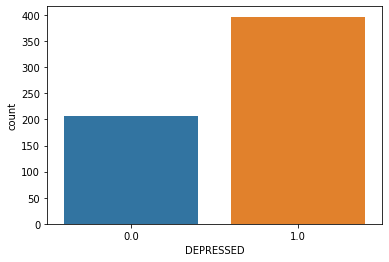

In [ ]:
sns.countplot(x="DEPRESSED", data=df)

Using smote,  I downsampled the dataset to balance it out (downsampling would yield better results than upsampling: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
np.bincount(y_res)

array([320, 320])

In [ ]:
X_res.shape, y_res.shape

((640, 12), (640,))

In [ ]:
y_res = y_res.to_numpy()
y_test = y_test.to_numpy()

#2 Classical classifier

The model I wish to use is Gradient Boosting.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix

The dataset doesn't contain any missing values, so there is no use to implement the KNN Imputer. Furthermore, as Gradient Boosting belongs to the family of Decision Tree-based algorithms, they never use multiple features at the same time, making feature scaling not necessary, unlike in other Machine Learning algorithms (Géron, p.725).

In [ ]:
booster = GradientBoostingClassifier(random_state=42)

In [ ]:
booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Set up a grid search.

In [ ]:
param_grid = {"n_estimators": [30, 50, 60, 100],
              "learning_rate": [0.05, 0.1, 0.2, 0.25, 0.3],
              "max_depth": [3, 4, 5]}

In [ ]:
gs = GridSearchCV(booster, param_grid, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)

We fit the data not to the original train data, but to the resized data performed by SMOTE.

In [ ]:
gs.fit(X_res, y_res)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [30, 50, 60, 100]},
             scoring='f1_macro', verbose=1)

In [ ]:
gs.best_score_

0.9043772196884824

In [ ]:
gs.best_estimator_

GradientBoostingClassifier(learning_rate=0.25, n_estimators=30, random_state=42)

In [ ]:
predictions = gs.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85        44
         1.0       0.93      0.88      0.91        77

    accuracy                           0.88       121
   macro avg       0.87      0.88      0.88       121
weighted avg       0.89      0.88      0.89       121



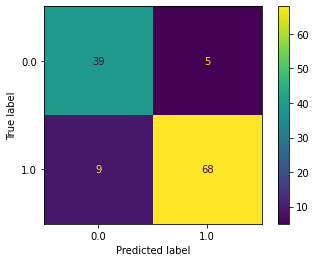

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
#help(ConfusionMatrixDisplay)
ConfusionMatrixDisplay.from_predictions(y_test, predictions)

#2.1 Error analysis

Let's plot the value of importance the model had given to the features.

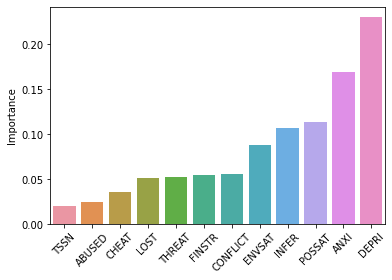

In [ ]:
feat_import = gs.best_estimator_.feature_importances_
import_feat = pd.DataFrame(index=X.columns, data=feat_import, columns=["Importance"])
import_feat = import_feat.sort_values("Importance")

sns.barplot(data=import_feat, x=import_feat.index, y="Importance")
plt.xticks(rotation=45);

We'll separate the errors the model made from the correct predictions it performed.

In [ ]:
x_error = X_test[predictions != y_test]
y_error = y_test[predictions != y_test]
p_error = predictions[predictions != y_test]

x_correct = X_test[predictions == y_test]
y_correct = y_test[predictions == y_test]
p_correct = predictions[predictions == y_test]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

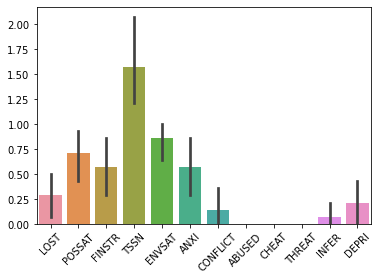

In [ ]:
sns.barplot(data=x_error)
plt.xticks(rotation=45)

The above plot shows that TSSN (time spent on social network) had the most weight in making incorrect predictions. Possibly this is due to fact that it was ordinally encoded; with higher ranking numbers putting more weight in the overall decision to label a person as depressed or not.

# Neural model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor="val_loss", mode = "min", patience=10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_res = scaler.fit_transform(X_res)
#X_test = scaler.transform(X_test)

In [ ]:
type(y_res)

numpy.ndarray

In [ ]:
print(X_res.shape, y_res.shape, X_test.shape, y_test.shape)

(640, 12) (640,) (121, 12) (121,)


In [ ]:
model = keras.models.Sequential()

#model.fit(X_res, y_res)
model.add(keras.layers.Dense(100, activation='relu', name='hidden1'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(50, activation='relu', name='hidden2'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(25, activation='relu', name='hidden3'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid', name='affine'))

sgd = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

num_epochs = 100
history = model.fit(X_res, y_res, epochs=num_epochs,
                    validation_data=(X_test, y_test),
                    callbacks = early_stop)

model.summary() # explain params

Epoch 1/100
20/20 [==============================] - 1s 17ms/step - loss: 0.7083 - accuracy: 0.5188 - val_loss: 0.6835 - val_accuracy: 0.6364
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6636 - accuracy: 0.5734 - val_loss: 0.6268 - val_accuracy: 0.8347
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6224 - accuracy: 0.6594 - val_loss: 0.5496 - val_accuracy: 0.8843
Epoch 4/100
20/20 [==============================] - 0s 12ms/step - loss: 0.5624 - accuracy: 0.7359 - val_loss: 0.4575 - val_accuracy: 0.8926
Epoch 5/100
20/20 [==============================] - 0s 15ms/step - loss: 0.5263 - accuracy: 0.7641 - val_loss: 0.3852 - val_accuracy: 0.8926
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4353 - accuracy: 0.8078 - val_loss: 0.3122 - val_accuracy: 0.8926
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.3905 - accuracy: 0.8438 - val_loss: 0.2788 - val_accuracy: 0.8843
Epoch 8

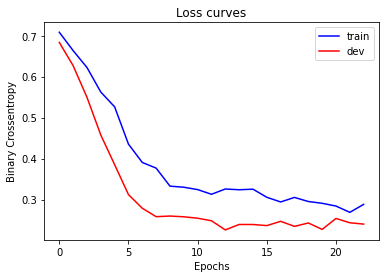

In [ ]:
epochs = range(1, num_epochs + 1)
train_loss = history.history['loss']
dev_loss = history.history['val_loss']

plt.plot(train_loss, 'b', label='train')
plt.plot(dev_loss, 'r', label='dev')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Binary Crossentropy');

In [ ]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

ValueError: ignored

In [ ]:
predictions

array([[0.07934877],
       [0.16899198],
       [0.1942749 ],
       [0.06256127],
       [0.9910799 ],
       [0.77184415],
       [0.9492662 ],
       [0.9876423 ],
       [0.04184747],
       [0.7107842 ],
       [0.578508  ],
       [0.34010237],
       [0.8735576 ],
       [0.69127405],
       [0.1942749 ],
       [0.6531725 ],
       [0.9651998 ],
       [0.87882316],
       [0.85517645],
       [0.17007193],
       [0.34450126],
       [0.04966956],
       [0.9512483 ],
       [0.99242413],
       [0.3024091 ],
       [0.42156264],
       [0.04966956],
       [0.22877264],
       [0.53521025],
       [0.99252176],
       [0.8841642 ],
       [0.06060022],
       [0.5208765 ],
       [0.9863193 ],
       [0.990149  ],
       [0.04297805],
       [0.857283  ],
       [0.0860655 ],
       [0.21750978],
       [0.12645927],
       [0.04184747],
       [0.38448107],
       [0.08556175],
       [0.9876153 ],
       [0.5395708 ],
       [0.06689101],
       [0.89327526],
       [0.096

# Appendix

In [ ]:
#the categories are too disorderded for ordinal encoding, so let's rearrange them

agerng = ['16-20','21-25', '26-30', '31-35', '36-40',
          '41-45', '46-50','51-55', '56-60', '61+']
edu = ['Post Graduate', 'Graduate', 'HSC', 'SSC']
prof = ['Other', 'Businessman', 'Service holder (Private)',
        'Service holder (Government)', 'Student', 'Unemployed']
marsts = ['Married', 'Unmarried', 'Divorced']
resdpl = ['City', 'Town', 'Village']
phyex = ['Regularly', 'Sometimes' 'Never']
avgslp = ['More than 8 hours', '8 hours', '7 hours',
          '6 hours', '5 hours', 'Below 5 hours']
tssn = ['Less than 2 hours', '2-4 hours a day', '5-7 hours a day',
        '8-10 hours a day', 'More than 10 hours a day']
wrkpre = ['No Pressure', 'Mild', 'Moderate', 'Severe']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

cat_encoder = OrdinalEncoder(categories=[edu, phyex, avgslp, tssn, wrkpre])

In [ ]:
df[["EDU", "PHYEX", "AVGSLP", "TSSN", "WRKPRE"]] = cat_encoder.fit_transform(df[["EDU",
                                                    "PHYEX", "AVGSLP", "TSSN", "WRKPRE"]])

ValueError: ignored

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

cat_encoder = OrdinalEncoder()


df[["AGERNG","EDU","PROF", "MARSTS", "RESDPL","PHYEX",
    "AVGSLP","TSSN","WRKPRE"]] = cat_encoder.fit_transform(df[["AGERNG","EDU",
                                                            "PROF", "MARSTS", "RESDPL",
                                                            "PHYEX","AVGSLP","TSSN","WRKPRE"]])


,AGERNG,GENDER,EDU,PROF,MARSTS,RESDPL,LIVWTH,ENVSAT,POSSAT,FINSTR,...,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,2.0,1.0,2.0,5.0,2.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,2.0,0.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,1.0,0.0,1.0,4.0,2.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,4.0,2.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,1.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1


In [ ]:
df_feat = df[["AGERNG","EDU","PROF", "MARSTS", "RESDPL","PHYEX","AVGSLP","TSSN","WRKPRE"]]
df_feat.head()

,AGERNG,EDU,PROF,MARSTS,RESDPL,PHYEX,AVGSLP,TSSN,WRKPRE
0,26-30,Post Graduate,Unemployed,Unmarried,Town,Sometimes,More than 8 hours,2-4 hours a day,No Pressure
1,26-30,Post Graduate,Service holder (Private),Unmarried,City,Never,6 hours,5-7 hours a day,Moderate
2,21-25,HSC,Student,Unmarried,City,Never,8 hours,8-10 hours a day,Mild
3,16-20,HSC,Student,Unmarried,City,Sometimes,7 hours,2-4 hours a day,Severe
4,21-25,Graduate,Student,Unmarried,Town,Never,7 hours,5-7 hours a day,Mild


In [ ]:
X = new_df.drop("DEPRESSED", axis=1)
y = new_df["DEPRESSED"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, shuffle=True, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((483, 65), (121, 65), (483,), (121,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

logreg = LogisticRegression(C=1, random_state=42)
logreg.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1, random_state=42)>

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
    'logisticregression__penalty': ["l2", "none"], #elasticnet is not supported by the default lbfgs solver
    'logisticregression__multi_class': ["auto", "ovr"],

    'gradientboostingclassifier__n_estimators': [50, 100],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [3, 4, 5]
    }]

In [ ]:
# Scaling numeric values
from sklearn.preprocessing import StandardScaler
# Machine Learning algorithm
from sklearn.linear_model import LogisticRegression
# Evaluating
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
logreg = LogisticRegression(random_state=42)

pipe = make_pipeline(scaler, logreg)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [ ]:
predictions = pipe.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        44
           1       0.93      0.92      0.93        77

    accuracy                           0.91       121
   macro avg       0.90      0.90      0.90       121
weighted avg       0.91      0.91      0.91       121

